In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


file_path = r"C:\Users\chris\Corporate_Environmental_Impact\data\raw\Scope-3-Environmental-Impact-Data-2022.xlsx"

df = pd.read_excel(file_path, sheet_name="0%")

# Zeilen mit fehlenden Werten entfernen
df=df.dropna()

# Nicht relevante Spalten entfernen (Angaben ob Wert geschätzt oder für ML verwendet wurde)
df = df.loc[:, ~df.columns.str.contains('Imputed|Set', case=False)]
print(df.columns)



Index(['Year', 'Company Name', 'Country', 'Industry (Exiobase)',
       'GHG Intensity (Sales)', 'GHG Intensity (Op Income)',
       'Total GHG Environmental Impact (Scope 1, 2, 3)', 'Scope 1', 'Scope 2',
       'Scope 3 ', 'Business Travel', 'Capital Goods',
       'Downstream Transportation and Distribution', 'Employee Commuting',
       'End of Life Treatment of Sold Products', 'Franchises',
       'Fuel-and-energy-related activities (not included in Scope 1 or 2)',
       'Investments', 'Processing of Sold Products',
       'Purchased Goods and Services',
       'Upstream Transportation and Distribution', 'Use of Sold Products',
       'Waste Generated in Operations'],
      dtype='object')


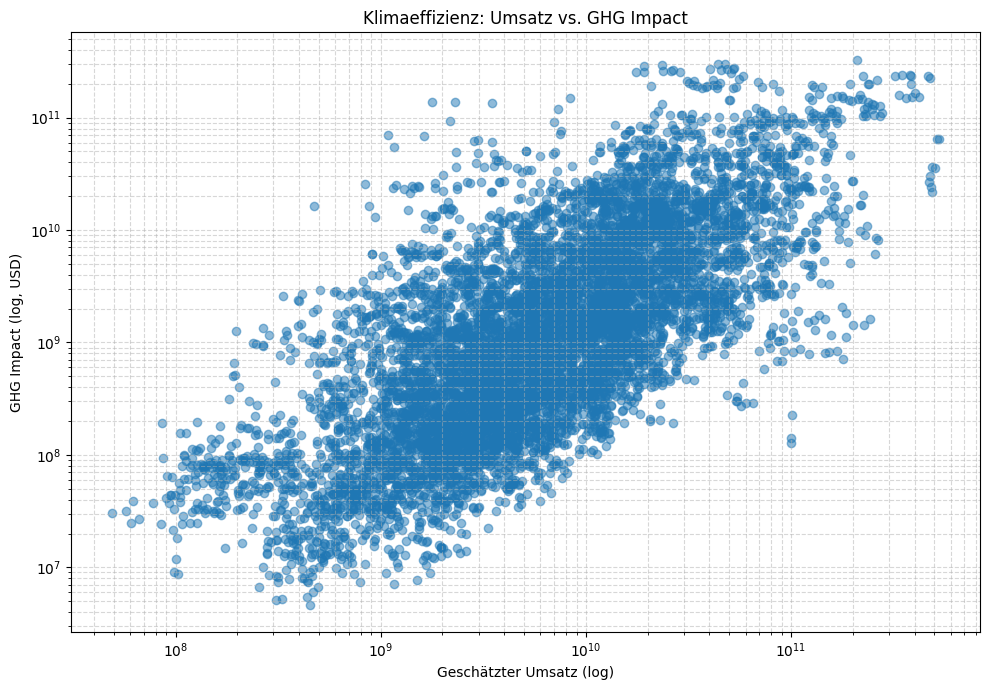

In [ ]:
# Wieviel Umsatz machen Unternehmen im Verhältnis zu den Emissionen? 

# In positive Werte umwandeln
df_eff['GHG Intensity (Sales)'] = df_eff['GHG Intensity (Sales)'].abs()
df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'] = df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'].abs()

# Geschätzter Umsatz berechnen
df_eff['Estimated Revenue'] = df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'] / df_eff['GHG Intensity (Sales)']

# Nur sinnvolle, positive Werte behalten
df_eff = df_eff[
    df_eff['Estimated Revenue'] > 0
]

# Streudiagramm
plt.figure(figsize=(10, 7))
plt.scatter(
    df_eff['Estimated Revenue'],
    df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'],
    alpha=0.5
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Geschätzter Umsatz (log)')
plt.ylabel('GHG Impact (log, USD)')
plt.title('Klimaeffizienz: Umsatz vs. GHG Impact')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.savefig("turnover_efficiency_scatter.png")
plt.show()


In [ ]:

df_eff['GHG Intensity (Sales)'] = df_eff['GHG Intensity (Sales)'].abs()
df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'] = df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'].abs()

df_eff['Estimated Revenue'] = df_eff['Total GHG Environmental Impact (Scope 1, 2, 3)'] / df_eff['GHG Intensity (Sales)']
df_eff = df_eff[df_eff['Estimated Revenue'] > 0]

# Interaktives Plotly-Diagramm erstellen
fig = px.scatter(
    df_eff,
    x='Estimated Revenue',
    y='Total GHG Environmental Impact (Scope 1, 2, 3)',
    hover_name='Company Name',
    hover_data=['Country', 'Industry (Exiobase)', 'Year'],
    log_x=True,
    log_y=True,
    title='Klimaeffizienz: Umsatz vs. GHG Impact (interaktiv)',
    labels={
        'Estimated Revenue': 'Geschätzter Umsatz',
        'Total GHG Environmental Impact (Scope 1, 2, 3)': 'GHG Impact (USD)'
    }
)

fig.update_traces(marker=dict(size=6, opacity=0.5))
fig.update_layout(height=700)
fig.write_html("../revenue_vs_emissions.html")
fig.show()
